In [1]:
import pandas as pd 
import numpy as np 
import xlrd 
import sklearn

In [2]:
clinc_table1 = pd.read_csv('../data/processed/process_clin_1.csv')
clinc_table2 = pd.read_csv('../data/processed/process_clin_2.csv')
clinc_table3 = pd.read_csv('../data/processed/process_clin_1_and_2.csv')

lip_table_specie = pd.read_csv('../data/processed/process_lip_specie_binary.csv')
# lip_table_specie = pd.read_csv('../data/processed/process_lip_specie_raw.csv')

gene_table = pd.read_csv('../data/processed/process_gene_new.csv')

In [3]:

# some patients have duplicate gene-test results
print('# duplicate gene samples is',len(set(gene_table['Patient_ID']))-len((gene_table['Patient_ID'])))

# duplicate gene samples is -29


In [4]:
gene_table # # num of gene feature: 365

,Patient_ID,gene_HDAC2_SNP_2,gene_HDAC2_INS_2,gene_HDAC2_DEL_2,gene_MET_SNP_2,gene_MET_INS_2,gene_MET_DEL_2,gene_MLH1_SNP_2,gene_MLH1_INS_2,gene_MLH1_DEL_2,...,gene_FGFR2_Del_2,gene_ESR1_Amp_2,gene_ESR1_Del_2,gene_CDK6_Amp_2,gene_CDK6_Del_2,gene_AR_Amp_2,gene_AR_Del_2,gene_MSH2_Amp_2,gene_MSH2_Del_2,gene_TMPRSS2-ERG_fussion_2
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1529,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,1530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,1531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,1534,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop the duplicate term, only use the first one
gene_table= gene_table.drop_duplicates(subset=['Patient_ID'],keep='first')
print('# duplicate gene samples is',len(set(gene_table['Patient_ID']))-len((gene_table['Patient_ID'])))

# duplicate gene samples is 0


In [10]:
# not use clic feafures

# samples at point1: normalize the clinic numerical features, except the time_gap, live/death label temporaly, we will add them at the end of merged all future
# clinc_table1_new = pd.DataFrame()

# clinc_table1_new['Patient_ID'] = clinc_table1['Patient_ID']
# num_feature_list = ['sdms psa at sample 1','sdms ldh at sample 1','BMI at time of collection']

# for name in num_feature_list:
#     df = clinc_table1[name]
#     clinc_table1_new['clin_' + name] = (df-df.min())/(df.max()-df.min())
# clinc_table1_new

# number of numerical features for samples at point3&4: 5

In [6]:
# targets for samples at point1:
clinc_target_1 = pd.DataFrame()

clinc_target_1['Patient_ID'] = clinc_table1['Patient_ID']
num_feature_list = ['ADT_start_fail','ADT_fail_relaspe','ADT_start_death','1= death; 0=alive','gap_death_consent','gap_surv_time_class','ADT_if_fail']

for name in num_feature_list:
    clinc_target_1[name] = clinc_table1[name]

clinc_target_1


,Patient_ID,ADT_start_fail,ADT_fail_relaspe,ADT_start_death,1= death; 0=alive,gap_death_consent,gap_surv_time_class,ADT_if_fail
0,1015,NaN,NaN,3039.0,0.0,3053,1,0
1,1027,NaN,NaN,959.0,1.0,959,0,0
2,1028,1734.0,54.0,3208.0,1.0,3219,1,2
3,1040,NaN,NaN,2323.0,0.0,2323,1,0
4,1048,897.0,67.0,2035.0,1.0,2073,2,2
...,...,...,...,...,...,...,...,...
94,1528,NaN,NaN,1472.0,1.0,1466,2,0
95,1530,NaN,NaN,34.0,0.0,1,0,0
96,1531,NaN,NaN,141.0,0.0,174,0,0
97,1532,NaN,NaN,1524.0,0.0,1694,2,0


In [33]:
# do nit use clic features

# # samples at point3&4: normalize the clinic numerical features, except the time_gap, live/death label temporaly, we will add them at the end of merged all future
# clinc_table2_new = pd.DataFrame()

# clinc_table2_new['Patient_ID'] = clinc_table2['Patient_ID']
# num_feature_list =  ['sdms psa at sample 1','sdms ldh at sample 1','sdms alk phos at sample 1','BMI at time of collection','Gleason Score at diagnosis']

# for name in num_feature_list:
#     df = clinc_table2[name]
#     clinc_table2_new['clin_' + name] = (df-df.min())/(df.max()-df.min())
# clinc_table2_new

# number of numerical features for samples at point3&4: 7

In [7]:
# targets for samples at point3%4:
clinc_target_2 = pd.DataFrame()

clinc_target_2['Patient_ID'] = clinc_table2['Patient_ID']
num_feature_list = ['gap_death_consent','1= death; 0=alive','gap_surv_time_class']

for name in num_feature_list:
    clinc_target_2[name] = clinc_table2[name]

clinc_target_2

,Patient_ID,gap_death_consent,1= death; 0=alive,gap_surv_time_class
0,1001,2062,1.0,1
1,1002,524,1.0,0
2,1003,208,1.0,0
3,1004,2390,1.0,1
4,1005,286,1.0,0
...,...,...,...,...
245,1517,145,1.0,0
246,1519,752,1.0,2
247,1520,1341,1.0,2
248,1524,1694,0.0,1


In [9]:
lip_table_specie.shape # num of lip_spicie feature: 774*2(binary)

(807, 1549)

In [10]:
# full-feature-data 2: point1 + lip_specie

merge_key = 'Patient_ID'
new1 = pd.merge(lip_table_specie,gene_table,on = merge_key)
# new2 = pd.merge(new1, clinc_table1_new,on = merge_key)
new3 = pd.merge(new1, clinc_target_1,on = merge_key)

print('overlapping patients:',-len(set(new3['Patient_ID']))+len((new3['Patient_ID'])))
new3.to_csv('../data/processed/all_feature_p1_lip_specie_binary.csv',index=False)
new3



overlapping patients: 0


,Patient_ID,lip_Sph(d16:1)_Sph_high_35,lip_Sph(d16:1)_Sph_low_35,lip_Sph(d18:1)_Sph_high_35,lip_Sph(d18:1)_Sph_low_35,lip_Sph(d18:2)_Sph_high_35,lip_Sph(d18:2)_Sph_low_35,lip_S1P(d16:1)_S1P_high_6,lip_S1P(d16:1)_S1P_low_6,lip_S1P(d18:0)_S1P_high_6,...,gene_MSH2_Amp_2,gene_MSH2_Del_2,gene_TMPRSS2-ERG_fussion_2,ADT_start_fail,ADT_fail_relaspe,ADT_start_death,1= death; 0=alive,gap_death_consent,gap_surv_time_class,ADT_if_fail
0,1028,0,1,0,1,0,1,0,1,1,...,0,0,1,1734.0,54.0,3208.0,1.0,3219,1,2
1,1066,0,1,0,1,0,1,1,0,1,...,0,0,0,NaN,NaN,NaN,0.0,2464,1,0
2,1040,0,1,1,0,0,1,1,0,1,...,0,0,0,NaN,NaN,2323.0,0.0,2323,1,0
3,1058,0,1,1,0,0,1,0,1,1,...,0,0,0,318.0,0.0,581.0,1.0,581,0,2
4,1059,0,1,0,1,0,1,0,1,1,...,0,0,0,NaN,NaN,2608.0,0.0,2608,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1530,1,0,1,0,1,0,1,0,1,...,0,0,0,NaN,NaN,34.0,0.0,1,0,0
67,1531,1,0,1,0,1,0,1,0,0,...,0,0,0,NaN,NaN,141.0,0.0,174,0,0
68,1522,1,0,0,1,1,0,1,0,1,...,0,0,0,NaN,NaN,3750.0,1.0,706,0,0
69,1514,1,0,1,0,0,1,0,1,0,...,0,0,0,2355.0,NaN,3453.0,1.0,1098,0,2


In [ ]:
365(gene)+
774*2(lip_spicie)
+1 (ID)
+7(target)
= 1921


In [11]:
# full-feature-data 4: point3&4 + lip_specie

merge_key = 'Patient_ID'
new1 = pd.merge(lip_table_specie,gene_table,on = merge_key)
new3 = pd.merge(new1, clinc_target_2,on = merge_key)
new3.to_csv('../data/processed/all_feature_p2_lip_specie_binary.csv',index=False)

print('overlapping patients:',len(set(new3['Patient_ID']))-len((new3['Patient_ID'])))

new3

overlapping patients: 0


,Patient_ID,lip_Sph(d16:1)_Sph_high_35,lip_Sph(d16:1)_Sph_low_35,lip_Sph(d18:1)_Sph_high_35,lip_Sph(d18:1)_Sph_low_35,lip_Sph(d18:2)_Sph_high_35,lip_Sph(d18:2)_Sph_low_35,lip_S1P(d16:1)_S1P_high_6,lip_S1P(d16:1)_S1P_low_6,lip_S1P(d18:0)_S1P_high_6,...,gene_CDK6_Amp_2,gene_CDK6_Del_2,gene_AR_Amp_2,gene_AR_Del_2,gene_MSH2_Amp_2,gene_MSH2_Del_2,gene_TMPRSS2-ERG_fussion_2,gap_death_consent,1= death; 0=alive,gap_surv_time_class
0,1001,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,2062,1.0,1
1,1010,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,655,1.0,2
2,1019,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,542,1.0,0
3,1046,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,1,477,1.0,0
4,1011,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,1418,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1495,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1289,1.0,2
140,1496,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1249,1.0,2
141,1505,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,2150,0.0,1
142,1506,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,99,1.0,0


In [55]:
# # full-feature-data 5: point 1 and 3&4 + lip_total

# merge_key = 'Patient_ID'
# new1 = pd.merge(lip_table_total,gene_table_new,on = merge_key)
# new2 = pd.merge(new1, clinc_table3_new,on = merge_key)

# # add time-gap feature & dead/live label 
# new2['gap_death_consent'] = clinc_table3['gap_death_consent']
# new2['1= death; 0=alive'] = clinc_table3['1= death; 0=alive']
# new2['gap_surv_time_class'] =  clinc_table3['gap_surv_time_class']
# new2.to_csv('../processed_data/all_feature_p1_and_2_lip_total_binary_lip.csv',index=False)
# new2

In [56]:
# # full-feature-data 6: point 1 and 3&4 + lip_specie

# merge_key = 'Patient_ID'
# new1 = pd.merge(lip_table_specie,gene_table_new,on = merge_key)
# new2 = pd.merge(new1, clinc_table3_new,on = merge_key)

# # add time-gap feature & dead/live label 
# new2['gap_death_consent'] = clinc_table3['gap_death_consent']
# new2['1= death; 0=alive'] = clinc_table3['1= death; 0=alive']
# new2['gap_surv_time_class'] =  clinc_table3['gap_surv_time_class']
# new2.to_csv('../processed_data/all_feature_p1_and_2_lip_specie_binary_lip.csv',index=False)
# new2

Text(0.5, 0, 'survive days')

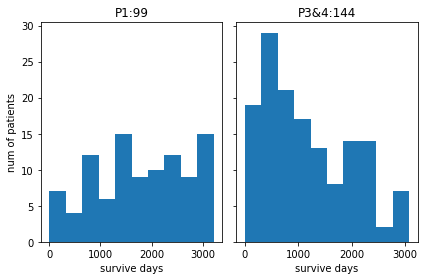

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(clinc_table1['gap_death_consent'])
axs[1].hist(new3['gap_death_consent'])

axs[0].title.set_text('P1:99')
axs[0].set_ylabel('num of patients')
axs[0].set_xlabel('survive days')

axs[1].title.set_text('P3&4:144')
axs[1].set_xlabel('survive days')


In [72]:
print('mean,%f top 33  %f, bottom %f '%(clinc_table1['gap_death_consent'].mean(),clinc_table1['gap_death_consent'].quantile(0.33),clinc_table1['gap_death_consent'].quantile(0.67)))

mean,1782.404040 top 33  1362.940000, bottom 2310.420000 


In [73]:
print('mean,%f top 33  %f, bottom %f '%(new3['gap_death_consent'].mean(),new3['gap_death_consent'].quantile(0.33),new3['gap_death_consent'].quantile(0.67)))

mean,1160.847222 top 33  607.560000, bottom 1374.810000 
